# Objective
The objetive of this notebook is to preprocess our cement production data. 
# Description of the data
The dataset is quaterly cement production data. As mentioned in [the book](https://otexts.com/fpp3/arima-ets.html#comparing-arima-and-ets-on-seasonal-data), the series is relatively long so we will divide the data into train and test.

# Imports, configuration and constants

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd

import utils as ut

In [2]:
plt.rc("figure", figsize=(8, 6))
plt.rc("font", size=13)

In [3]:
PLOT_TITLE = "AUS cement production"
PLOT_YLABEL = "Cement"
PLOT_XLABEL = "Quarter"

PLOT_KWARGS = {
    "title": PLOT_TITLE,
    "ylabel": PLOT_YLABEL,
    "xlabel": PLOT_XLABEL,
}

# Load data

In [4]:
data_dir_path = "../../data-raw/"
aus_production_path = os.path.join(data_dir_path, "aus_production.csv")

df = pd.read_csv(aus_production_path, sep='|')
df.columns = df.columns.str.lower()

# Prepare data
Filter the data as done in the book.

In [5]:
df = df.rename(columns={"quarter": "year_quarter"})

# Split the 'year_quarter' column into separate 'year' and 'quarter' columns
df[['year', 'quarter']] = df['year_quarter'].str.split(' Q', expand=True)

# Combine the 'year' and 'quarter' columns into a datetime column
df['date'] = (
    pd.PeriodIndex(
        year=df['year'].astype(int), 
        quarter=df['quarter'].astype(int)
    ).to_timestamp()
)

df = df[["cement", "date"]]
df = df[df.date >= "1988-01-01"]

df.head()

,cement,date
128,1418,1988-01-01
129,1625,1988-04-01
130,1770,1988-07-01
131,1791,1988-10-01
132,1621,1989-01-01


/home/santiagopalmero/repos/fpp3package/python/mlflow/utils.py:64: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


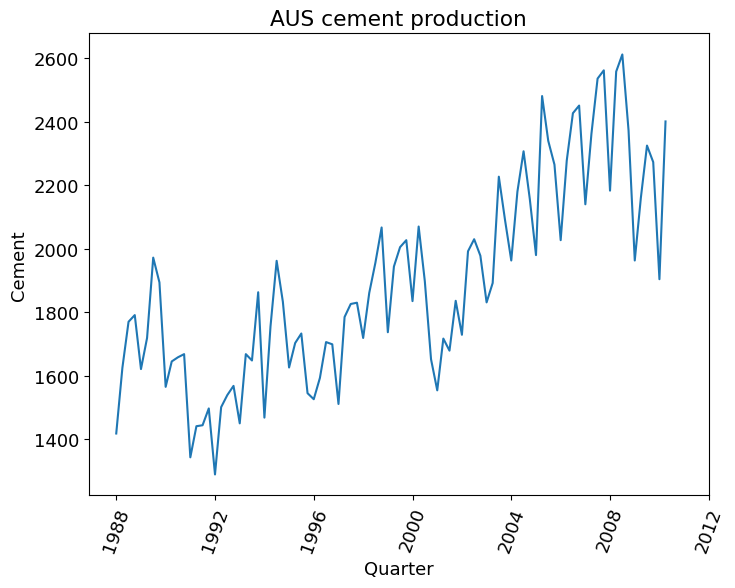

In [6]:
ut.plot_ts_data(df.date, df.cement, start_time="1988", **PLOT_KWARGS)

In [7]:
ts = pd.Series(df.cement.values, index=df.date)
ts.head()

date
1988-01-01    1418
1988-04-01    1625
1988-07-01    1770
1988-10-01    1791
1989-01-01    1621
dtype: int64

In [9]:
date_split = "2008-01-01"

ts_train = ts[ts.index < date_split]
ts_test = ts[ts.index >= date_split]

/home/santiagopalmero/repos/fpp3package/python/mlflow/utils.py:64: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


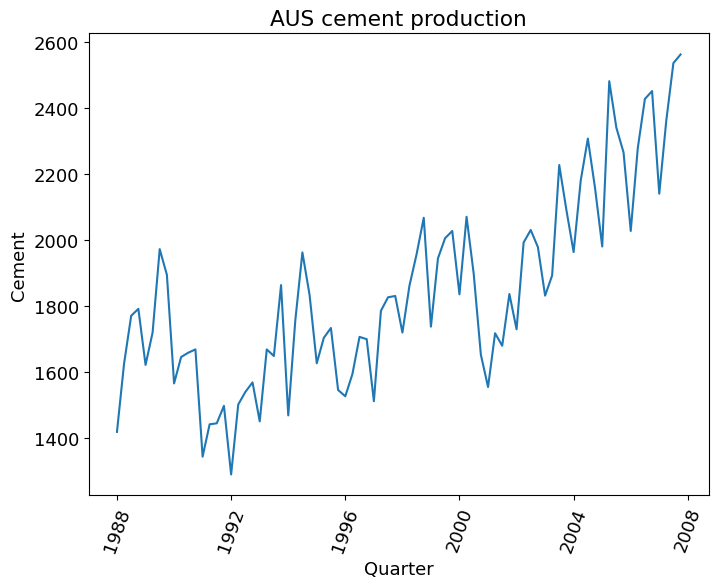

In [10]:
ut.plot_ts(ts_train, **PLOT_KWARGS)

/home/santiagopalmero/repos/fpp3package/python/mlflow/utils.py:64: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


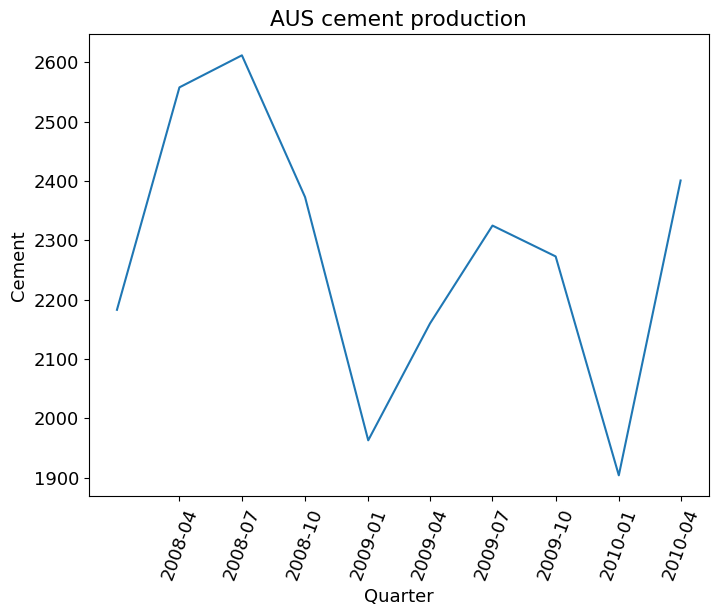

In [11]:
ut.plot_ts(ts_test, **PLOT_KWARGS)

# Save datasets

In [12]:
os.makedirs("data", exist_ok=True)

In [13]:
ts_train.to_csv("data/ts_train.csv")
ts_test.to_csv("data/ts_test.csv")

In [14]:
ut.read_csv_series("data/ts_train.csv")


date
1988-01-01    1418
1988-04-01    1625
1988-07-01    1770
1988-10-01    1791
1989-01-01    1621
              ... 
2006-10-01    2451
2007-01-01    2140
2007-04-01    2362
2007-07-01    2536
2007-10-01    2562
Length: 80, dtype: int64

In [15]:
ut.read_csv_series("data/ts_test.csv")

date
2008-01-01    2183
2008-04-01    2558
2008-07-01    2612
2008-10-01    2373
2009-01-01    1963
2009-04-01    2160
2009-07-01    2325
2009-10-01    2273
2010-01-01    1904
2010-04-01    2401
dtype: int64